In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader.data as web

In [13]:
df=web.DataReader('SPY','yahoo','2000-01-01','2017-12-31')

In [14]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,100.934494
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,96.987312
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,97.160843
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,95.599319
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,101.151367


Text(0.5, 1.0, 'SPY lag plot')

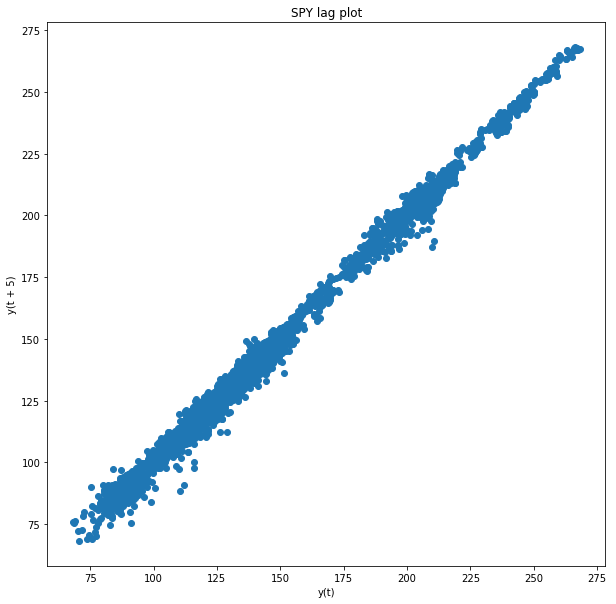

In [15]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5)
plt.title('SPY lag plot')

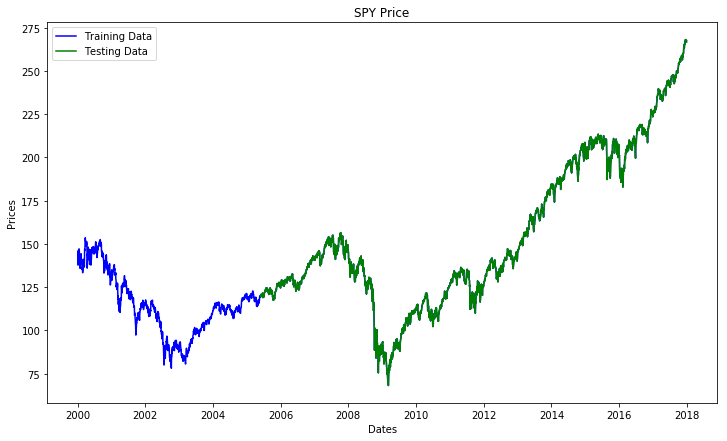

In [18]:
train_data, test_data = df[0:int(len(df)*0.3)], df[int(len(df)*0.3):]
plt.figure(figsize=(12,7))
plt.title('SPY Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()


In [19]:
def smape_err(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +  np.abs(y_true)))

In [20]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_err(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\ganev\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In t

Testing Mean Squared Error: 2.322
Symmetric mean absolute percentage error: 31.208


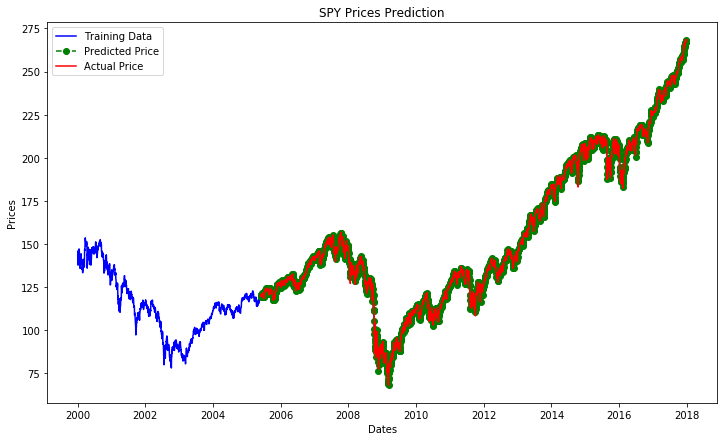

In [21]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('SPY Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [22]:
pred= pd.DataFrame(predictions, columns= ['ARIMAPred'] ,index = test_data.index)

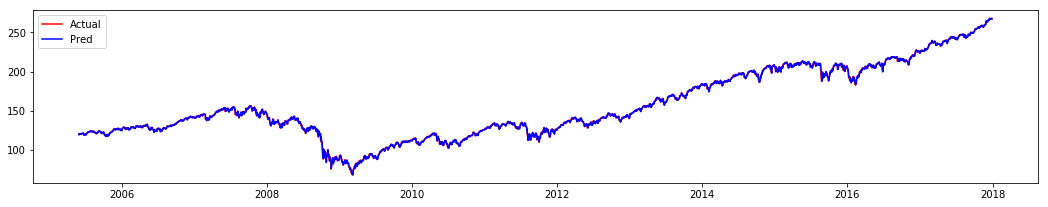

In [24]:
fig=plt.figure(figsize=(18,4))

ax=plt.subplot2grid((5,4),(0,0),colspan=4,rowspan=4)
ax.plot(test_data.index, test_data['Close'],color='r', label='Actual')
ax.plot(test_data.index, pred['ARIMAPred'],color='b', label='Pred')

plt.legend()

In [30]:
#loading combined dataframe 
final_data=pd.read_csv('data/final_data.csv')
final_data=final_data.set_index('Date', drop=True)

In [31]:
final_data=final_data.merge(pred, left_index=True, right_index=True)

In [32]:
#checking
print(len(final_data))
final_data.head()

2734


,newsSentiment,Bullish,Neutral,Bearish,Bullish 8-Week Mov Avg,Bull-Bear Spread,Bullish Average,Bullish Average + St. Dev,Bullish Average - St. Dev,High_DBC,...,Adj Close_XLF,RSI_XLF,High_XRT,Low_XRT,Open_XRT,Close_XRT,Volume_XRT,Adj Close_XRT,RSI_XRT,ARIMAPred
Date,,,,,,,,,,,,,,,,,,,,,
2007-02-22,0.42,0.5385,0.2385,0.2231,0.48095,0.3154,0.384907,0.488293,0.281522,25.150000,...,18.043667,56.610596,21.969999,21.700001,21.895000,21.830000,623600.0,18.426498,69.379187,145.966158
2007-02-23,0.04,0.5385,0.2385,0.2231,0.48095,0.3154,0.384907,0.488293,0.281522,25.420000,...,17.875931,48.687708,21.764999,21.590000,21.764999,21.719999,1688400.0,18.333652,64.632872,145.861243
2007-02-26,0.33,0.5385,0.2385,0.2231,0.48095,0.3154,0.384907,0.488293,0.281522,25.490000,...,17.746534,43.616393,21.745001,21.510000,21.745001,21.594999,528600.0,18.228136,59.639849,145.337678
2007-02-27,0.31,0.5385,0.2385,0.2231,0.48095,0.3154,0.384907,0.488293,0.281522,25.340000,...,16.917431,25.377127,21.305000,20.645000,21.215000,20.705000,1533600.0,17.476902,37.454108,145.217983
2007-02-28,0.36,0.5385,0.2385,0.2231,0.48095,0.3154,0.384907,0.488293,0.281522,25.299999,...,17.228941,36.176334,21.070000,20.670000,20.674999,21.000000,759600.0,17.725908,44.785816,139.713898


In [33]:
#saving
final_data.to_csv('data/final_data.csv')